In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

In [2]:
data = pd.read_csv("C:\project\diabetes_dataset.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data["BloodPressure"].median()

72.0

In [4]:
data["Insulin"].median()

30.5

In [5]:
data.shape

(768, 9)

In [6]:
#if any null value is present
data.isnull().values.any()

False

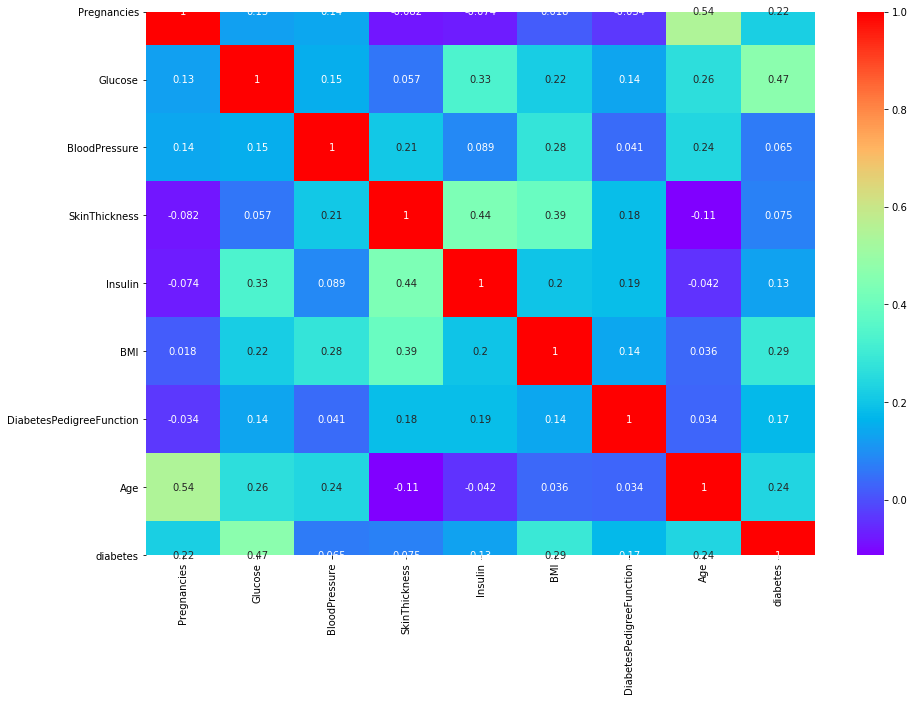

In [7]:
import seaborn as sn

plt.figure(figsize=(15,10))
corrmat = data.corr()
top_corr_feature = corrmat.index
g = sn.heatmap(data[top_corr_feature].corr(),annot = True, cmap = "rainbow")

In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
# no. of ture and false value of diabetes

diabetes_true_count = len(data.loc[data['diabetes']==True])

diabetes_false_count = len(data.loc[data['diabetes']==False])

In [10]:
(diabetes_true_count ,diabetes_false_count)

(268, 500)

In [11]:
from sklearn.model_selection import train_test_split

feature_col = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

predicted_class =["diabetes"]

In [12]:
x = data[feature_col].values
y = data[predicted_class].values


## check how many other missing(zero) values

In [13]:
print("total numbers of rows : {}".format(len(data)))
print("number of rows missing Pregnancies : {}".format(len(data.loc[data['Pregnancies']==0])))
print("number of rows missing Glucose : {}".format(len(data.loc[data['Glucose']==0])))
print("number of rows missing BloodPressure : {}".format(len(data.loc[data['BloodPressure']==0])))
print("number of rows missing SkinThickness : {}".format(len(data.loc[data['SkinThickness']==0])))
print("number of rows missing Insulin : {}".format(len(data.loc[data['Insulin']==0])))
print("number of rows missing BMI : {}".format(len(data.loc[data['BMI']==0])))
print("number of rows missing DiabetesPedigreeFunction : {}".format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print("number of rows missing Age : {}".format(len(data.loc[data['Age']==0])))

total numbers of rows : 768
number of rows missing Pregnancies : 111
number of rows missing Glucose : 5
number of rows missing BloodPressure : 35
number of rows missing SkinThickness : 227
number of rows missing Insulin : 374
number of rows missing BMI : 11
number of rows missing DiabetesPedigreeFunction : 0
number of rows missing Age : 0


In [14]:
from sklearn.preprocessing import Imputer

fill_values = Imputer(missing_values=0, strategy="median", axis=0)
x_train = fill_values.fit_transform(x)
y_train = fill_values.fit_transform(y)


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

## RANDOM FOREST CLASSIFIER:

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
yp =clf.predict(x_test)

In [18]:
print(accuracy_score(y_test,yp))

0.7597402597402597


In [19]:
cm = confusion_matrix(y_test,yp)
cm

array([[83, 16],
       [21, 34]], dtype=int64)

# create pickle file for classifier:

In [20]:
import pickle
filename = 'diabetes_prediction_RFC.pkl'
pickle.dump(clf,open(filename,'wb'))